In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Survey Results.csv')

In [4]:
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [5]:
df.describe()

,Premium Savings very important,Agent Not Important
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [1]:
#Plot/Visualize the Data
df.plot(x='Premium Savings very important', y='Agent Not Important',kind='scatter', figsize=(10,7))

NameError: name 'df' is not defined

In [7]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [8]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df.copy()
df_k3['Label'] = k3_labels

In [9]:
df_k3.head()

,Premium Savings very important,Agent Not Important,Label
0,5,5,1
1,6,7,1
2,6,5,1
3,6,6,1
4,5,6,1


In [10]:
#Check the size of each cluster
df_k3.Label.value_counts()

1    71
2    54
0    25
Name: Label, dtype: int64

In [11]:
df_k3[(df_k3.Label == 1)].describe()

,Premium Savings very important,Agent Not Important,Label
count,71.000000,71.000000,71.0
mean,5.830986,5.901408,1.0
std,0.810395,0.700101,0.0
min,5.000000,5.000000,1.0
25%,5.000000,5.000000,1.0
50%,6.000000,6.000000,1.0
75%,6.500000,6.000000,1.0
max,7.000000,7.000000,1.0


In [12]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k3, index = ['Label'], values = ['Premium Savings very important','Agent Not Important'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                               amin  \
      Agent Not Important Premium Savings very important Agent Not Important   
Label                                                                          
0                3.680000                       3.600000                   3   
1                5.901408                       5.830986                   5   
2                1.777778                       2.037037                   1   

                                                    amax  \
      Premium Savings very important Agent Not Important   
Label                                                      
0                                  2                   5   
1                                  5                   7   
2                                  1                   3   

                                      
      Premium Savings very important  
Label                                 
0                                  5  
1                                  7  
2                                  3

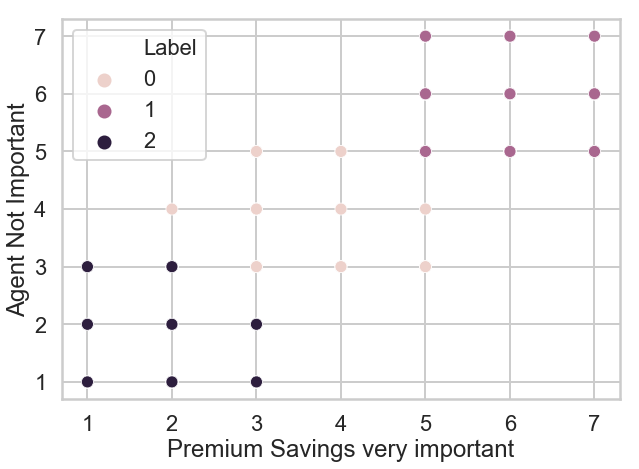

In [20]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3['Premium Savings very important'], y=df_k3['Agent Not Important'], hue=df_k3.Label)

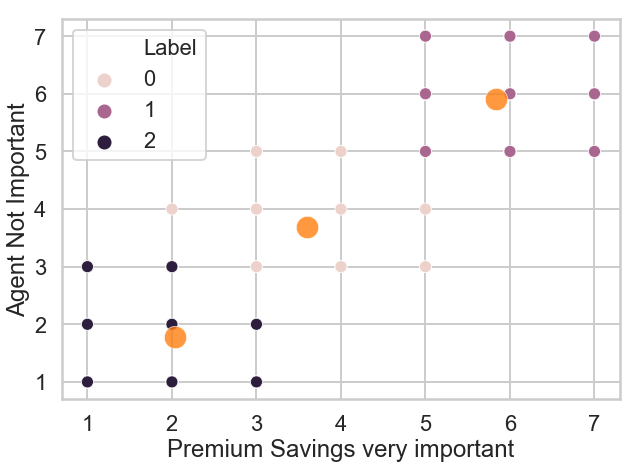

In [21]:
#Visualize the Cluster Centers
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3['Premium Savings very important'], y=df_k3['Agent Not Important'], hue=df_k3.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8)

In [22]:
# Elbow method

#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	266.9726173541963
3	178.98094940010432
4	144.35327400571305
5	116.05806566658494
6	94.2636146559608
7	78.05805910040525
8	64.02894669829655
9	56.68969944370403
10	47.60354562877783


Text(0,0.5,'Score')

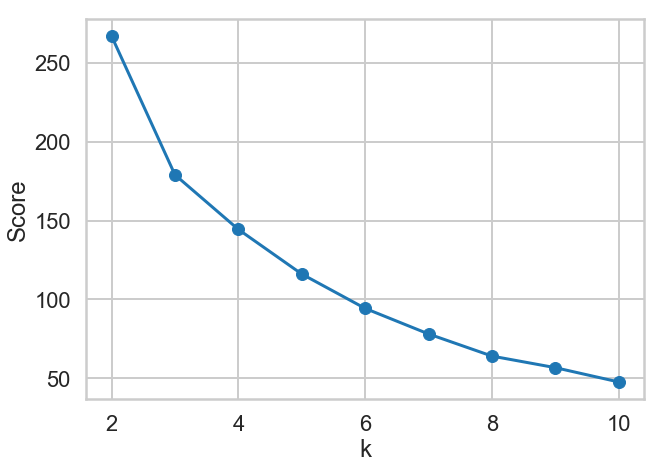

In [23]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

In [24]:
# Silhouette method

#Import the Silhouette Functions from sklearn and colormap from matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

('For n_clusters =', 2, 'The average silhouette_score is :', 0.6450368299887457)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.5091672245491061)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.4115023361984005)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.42196418498497834)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.44548800997192556)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.4814792912278525)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.4924760984921401)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.5139616507133073)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.5491218492060607)


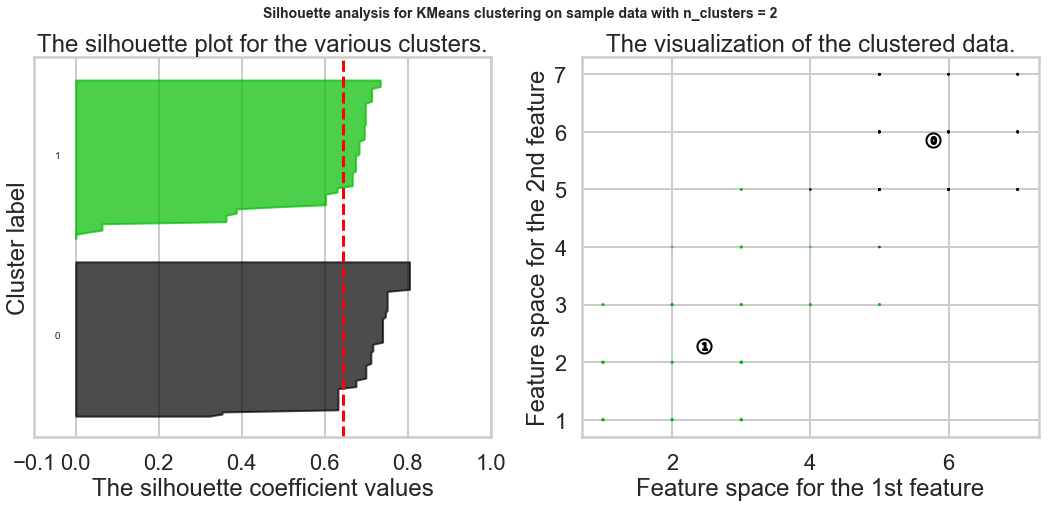

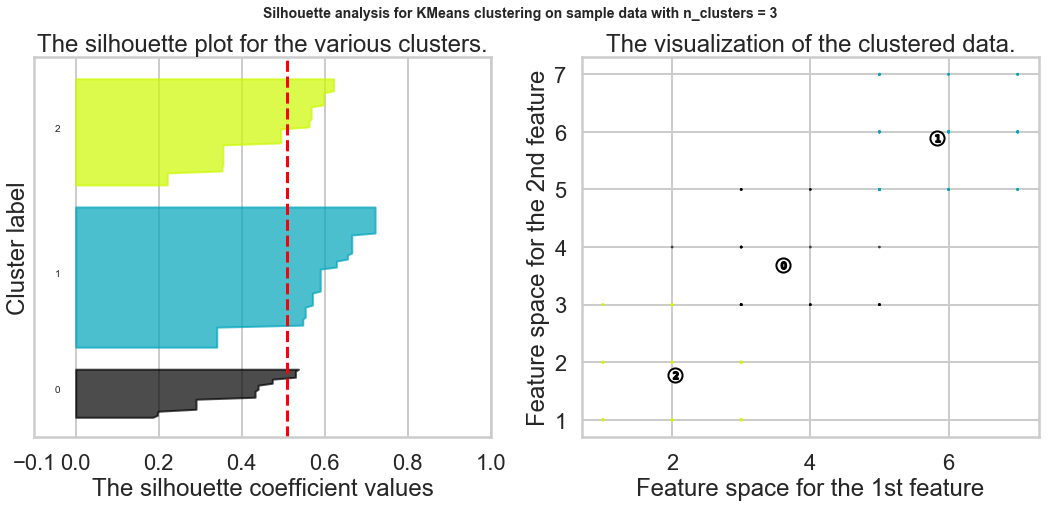

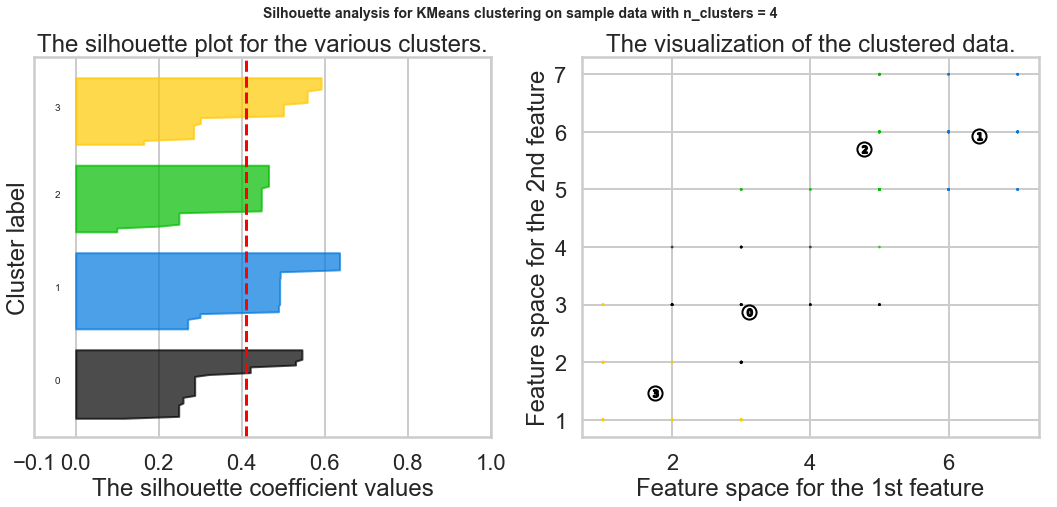

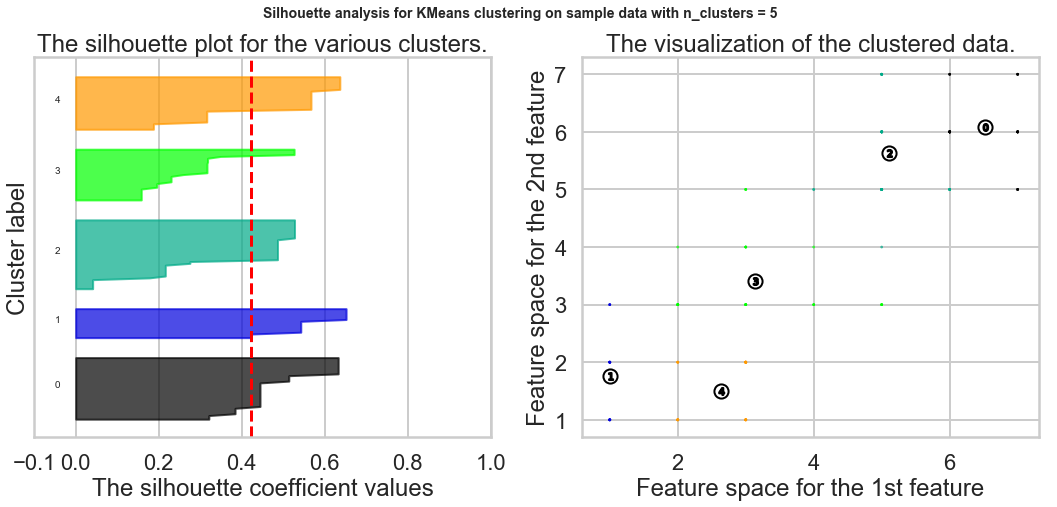

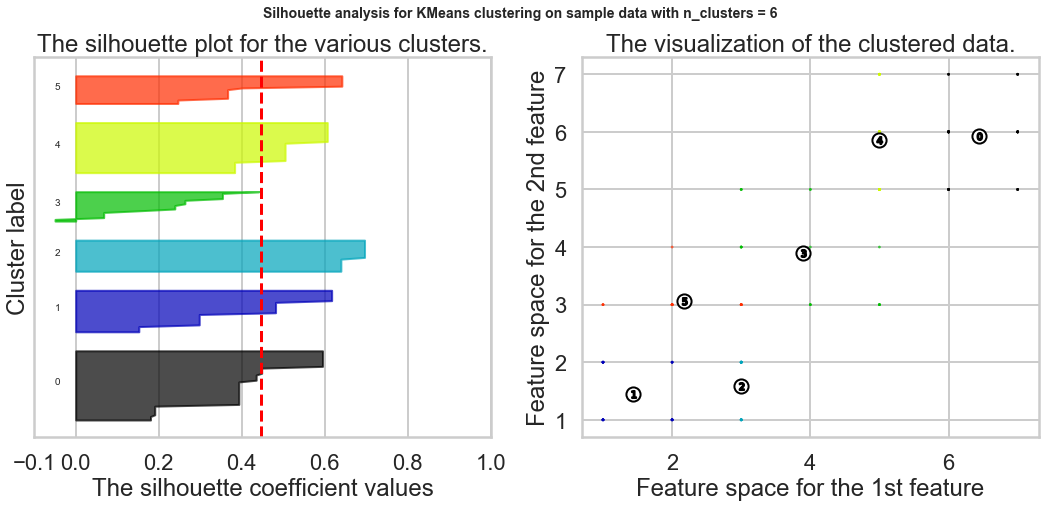

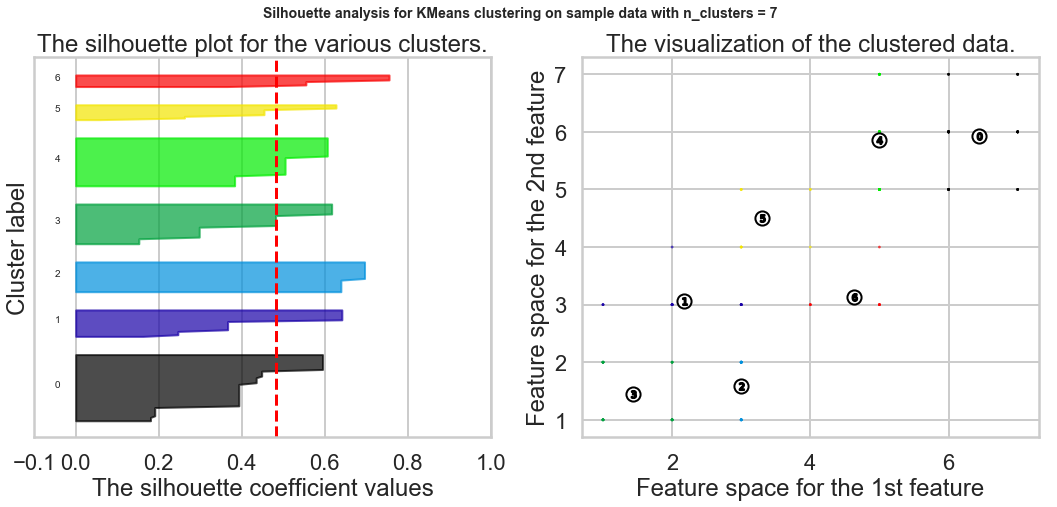

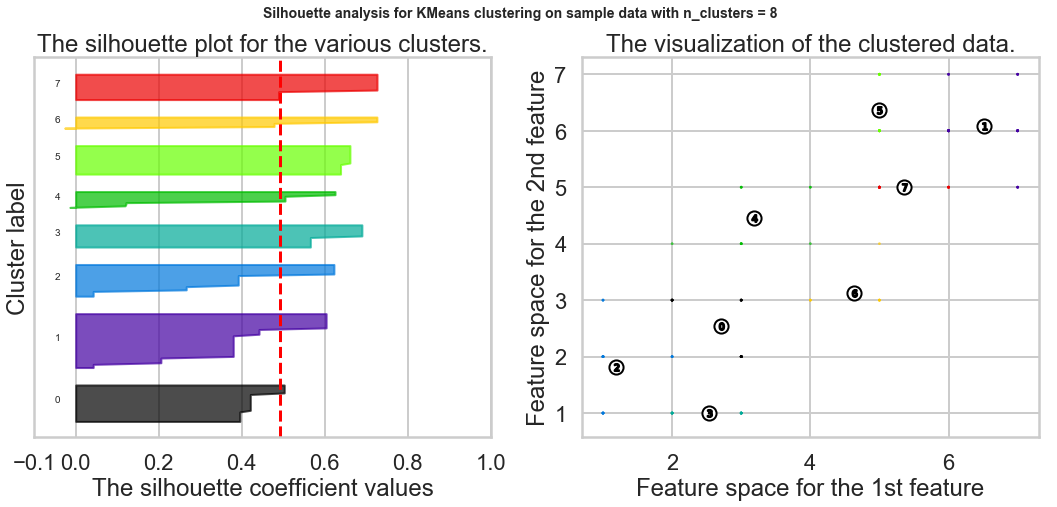

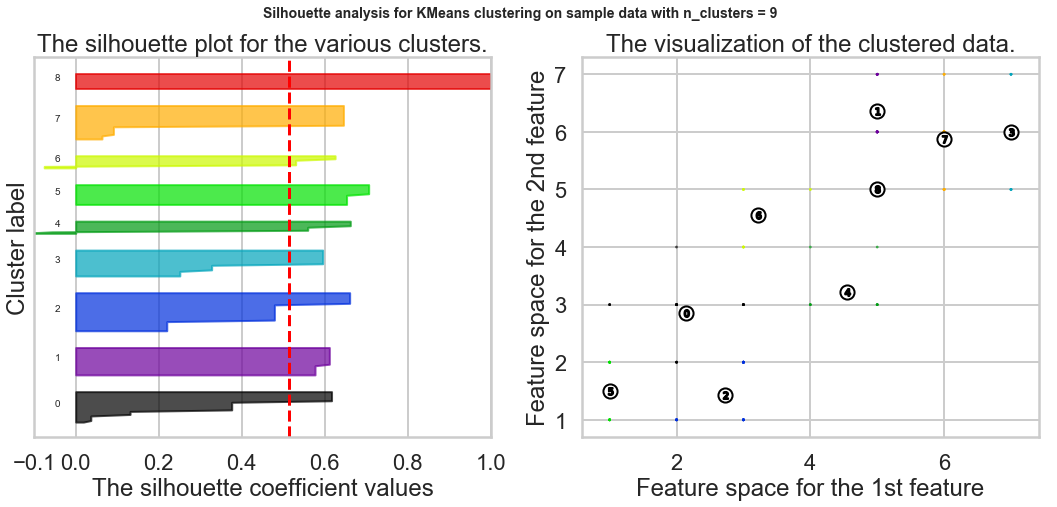

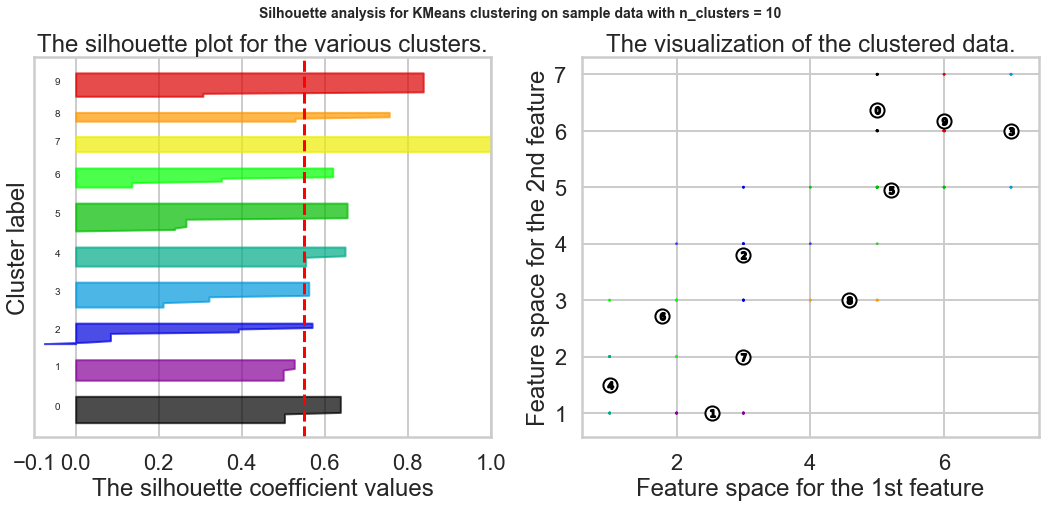

In [27]:
## Change all "X" variables to df; All changes from the original code can be found after the ###---### comments.

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df['Premium Savings very important'], df['Agent Not Important'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

CONCLUSIONS:

1. How many segments would you create?

I would create three clusters.

2. Describe each segment you create in terms of the input variables

Cluster 2 are people for whom getting to personally consult with an agent is significantly more important than premium savings.

Cluster 1 values savings on premiums paid the most and doesn't need an agent to purchase insurance products.

Cluster 0 wants a balance of the two.

3. How would you target each customer segment?

(Disclaimer: More information/context about the data is necesary to make accurate conclusions)

Cluster 2: Target them with sales agents who reach out directly and make themselves available to potential and current customers. A personal approach makes them more comfortable about making decisions.

Cluster 1: Target them with products that offer more coverage/add ons for maximum coverage (e.g. health, investments, accident, retirement, rebates). Perhaps include a feature in your website that allows them to build their own packages.

Cluster 0:  Perhaps employ both/a combination of the above strategies. Flexible insurance packages with average savings may be offered to this group.
